In [2]:
import numpy as np
import IPython
import librosa

from scipy import signal as sp
from scipy.io import wavfile
from math import pi
from scipy.fftpack import fft
from scipy.fftpack import fftshift
from scipy.interpolate import interp1d as itp
import math
import cmath as cm

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import sounddevice as sd
from scipy.io.wavfile import write
#from plot_zplane import zplane

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

def plot_signal(x, xaxis_label=None,yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return

def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k


In [3]:
a=3

<ipython-input-7-e7c63c1b8b35>:7: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


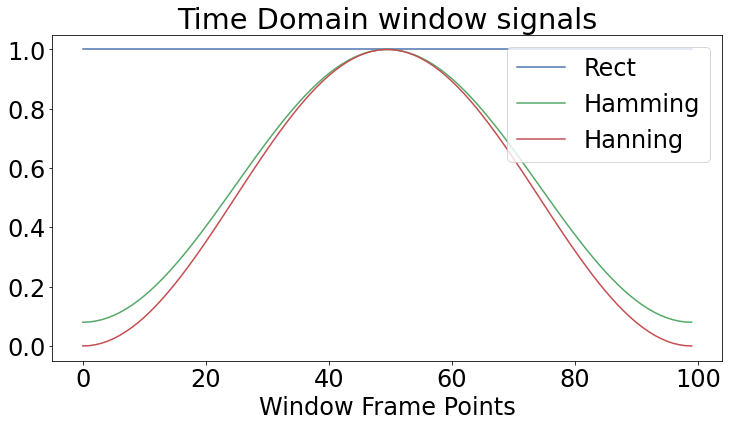

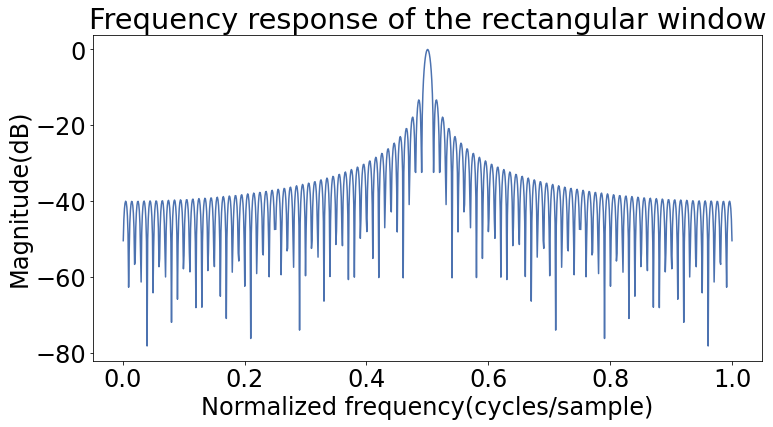

<ipython-input-7-e7c63c1b8b35>:7: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


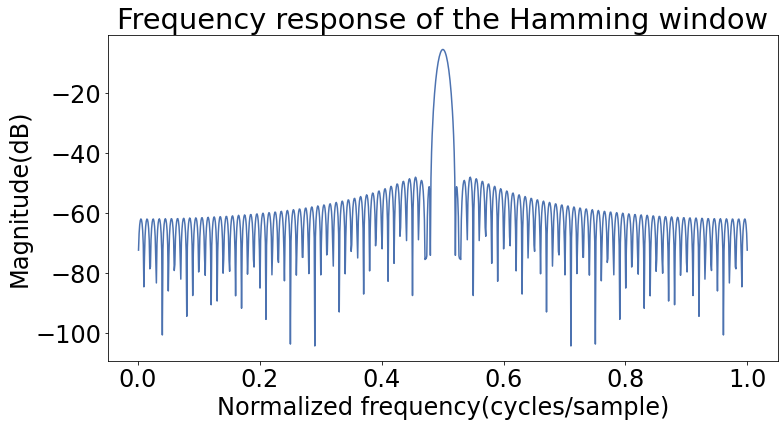

<ipython-input-7-e7c63c1b8b35>:7: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


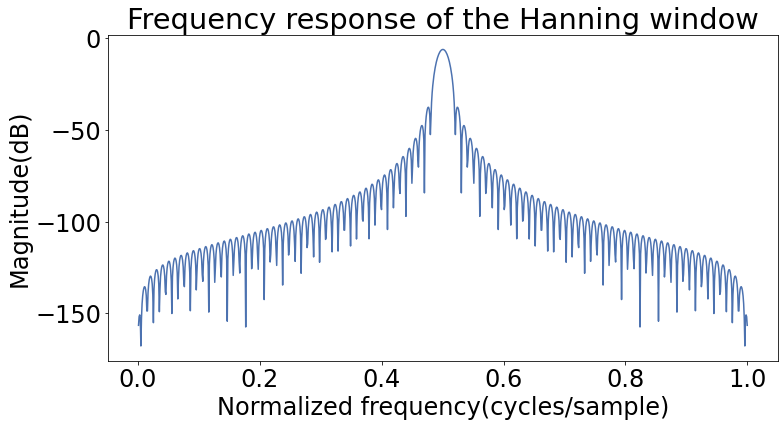

In [7]:
#Problem 1

def freq_resp(window,N,title):
    A = fft(window, 1024) / N
    mag = np.abs((fftshift(A)))
    freq = np.linspace(0, 1, len(A))
    response = 20 * np.log10(mag)

    #response = np.clip(response, -100, 100)
    plt.plot(freq, response)
    plt.title(title)
    plt.ylabel("Magnitude(dB)")
    plt.xlabel("Normalized frequency(cycles/sample)")
    plt.axis('tight')
    plt.show()

w1=sp.boxcar(100)
w2=np.hamming(100)
w3=np.hanning(100)

plt.figure()
plt.plot(w1,label="Rect")
plt.plot(w2,label="Hamming")
plt.plot(w3,label="Hanning");plt.title("Time Domain window signals");plt.xlabel("Window Frame Points")
plt.legend(loc="upper right")

plt.figure()
freq_resp(w1,100,"Frequency response of the rectangular window")
plt.figure()
freq_resp(w2,100,"Frequency response of the Hamming window")
plt.figure()
freq_resp(w3,100,"Frequency response of the Hanning window")

<ipython-input-137-1dc751d86806>:5: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


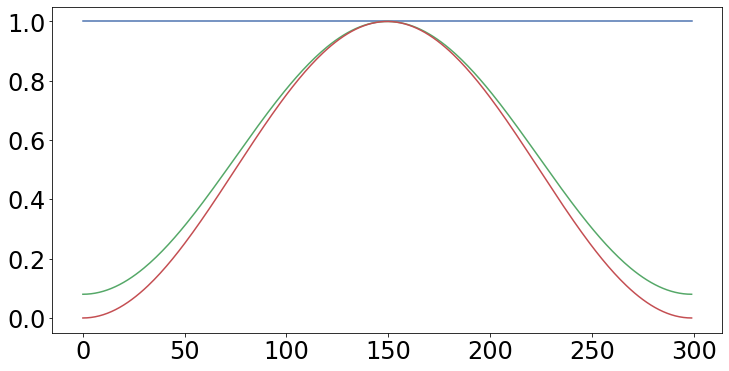

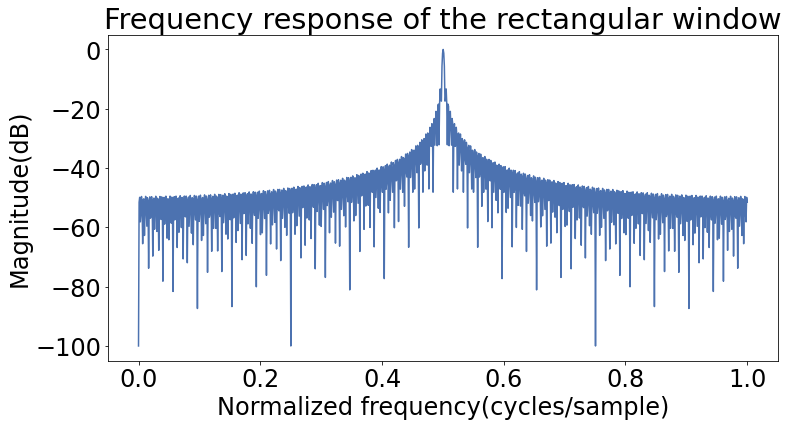

<ipython-input-137-1dc751d86806>:5: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


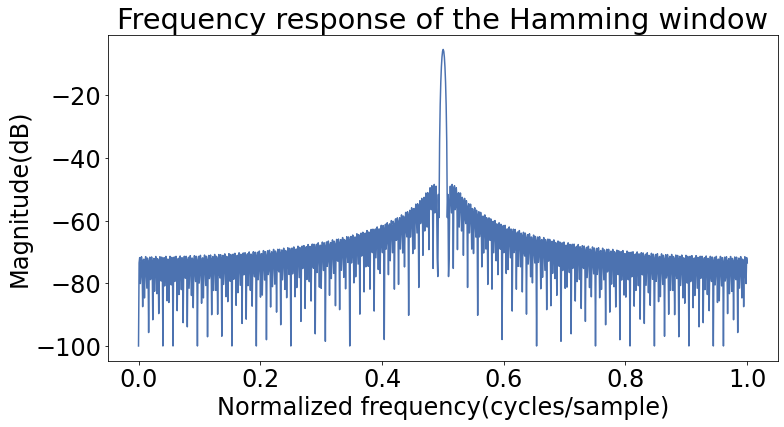

<ipython-input-137-1dc751d86806>:5: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


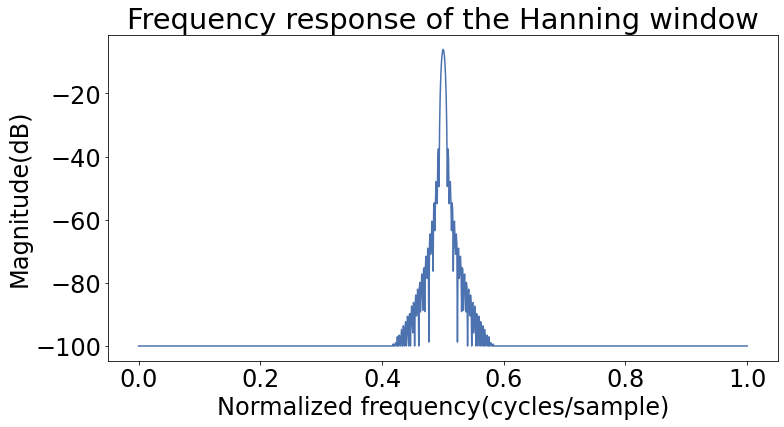

In [137]:
def freq_resp(window,N,title):
    A = fft(window, 1024) / N
    mag = np.abs((fftshift(A)))
    freq = np.linspace(0, 1, len(A))
    response = 20 * np.log10(mag)

    response = np.clip(response, -100, 100)
    plt.plot(freq, response)
    plt.title(title)
    plt.ylabel("Magnitude(dB)")
    plt.xlabel("Normalized frequency(cycles/sample)")
    plt.axis('tight')
    plt.show()

w1=sp.boxcar(300)
w2=np.hamming(300)
w3=np.hanning(300)

plt.figure()
plt.plot(w1)
plt.plot(w2)
plt.plot(w3)

plt.figure()
freq_resp(w1,300,"Frequency response of the rectangular window")
plt.figure()
freq_resp(w2,300,"Frequency response of the Hamming window")
plt.figure()
freq_resp(w3,300,"Frequency response of the Hanning window")

<ipython-input-18-c85d32754d63>:9: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


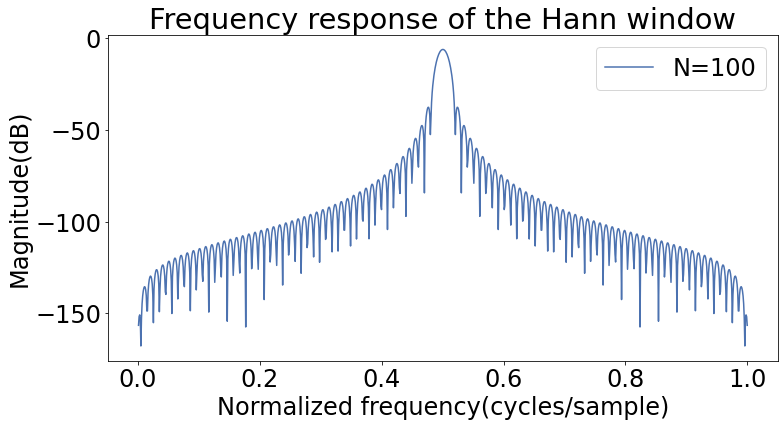

In [18]:
#Problem 1 


window=np.hanning(100)

A = fft(window, 1024) / 100
mag = np.abs((fftshift(A)))
freq = np.linspace(0, 1, len(A))
response = 20 * np.log10(mag)

#response = np.clip(response, -100, 100)
plt.plot(freq, response,label='N=100')
plt.title("Frequency response of the Hann window")
plt.ylabel("Magnitude(dB)")
plt.xlabel("Normalized frequency(cycles/sample)");plt.legend()
plt.axis('tight')
plt.show()

<ipython-input-21-f85b34d7ac41>:6: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


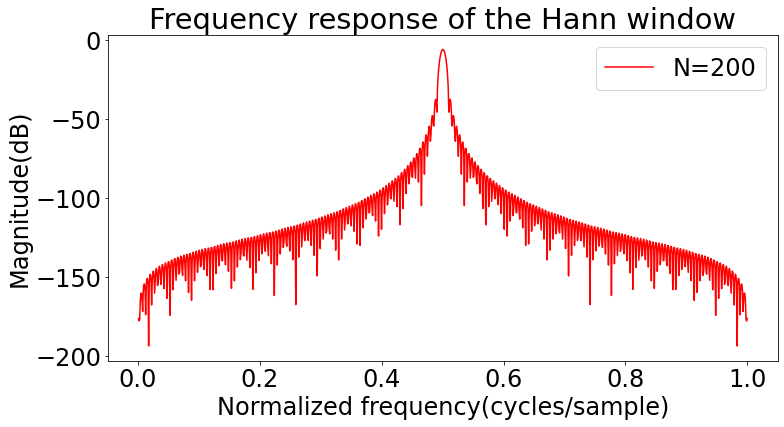

In [21]:
window=np.hanning(200)

A = fft(window, 1024) / 200
mag = np.abs((fftshift(A)))
freq = np.linspace(0, 1, len(A))
response = 20 * np.log10(mag)

#response = np.clip(response, -100, 100)

plt.plot(freq, response,'r',label='N=200')
plt.title("Frequency response of the Hann window")
plt.ylabel("Magnitude(dB)")
plt.xlabel("Normalized frequency(cycles/sample)");plt.legend()
plt.axis('tight')
plt.show()

<ipython-input-22-6bb198d34a1b>:6: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


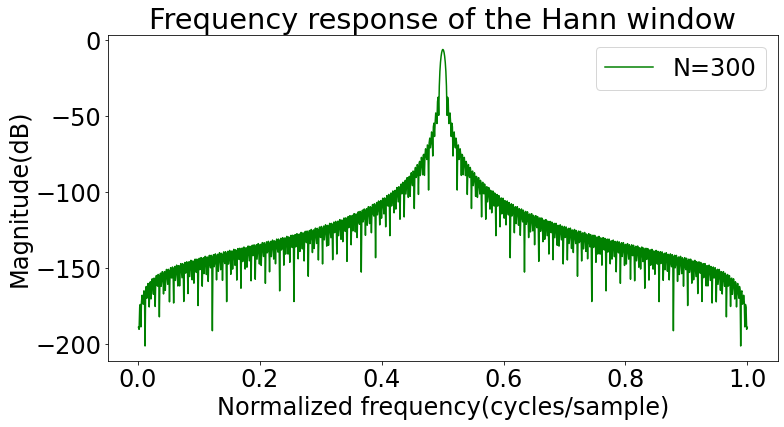

In [22]:
window=np.hanning(300)

A = fft(window, 1024) / 300
mag = np.abs((fftshift(A)))
freq = np.linspace(0, 1, len(A))
response = 20 * np.log10(mag)

#response = np.clip(response, -100, 100)

plt.plot(freq, response,'g',label='N=300')
plt.title("Frequency response of the Hann window")
plt.ylabel("Magnitude(dB)")
plt.xlabel("Normalized frequency(cycles/sample)");plt.legend()
plt.axis('tight')
plt.show()

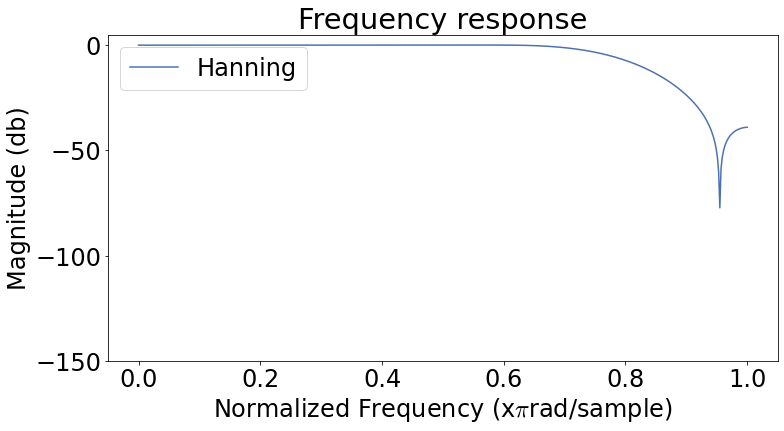

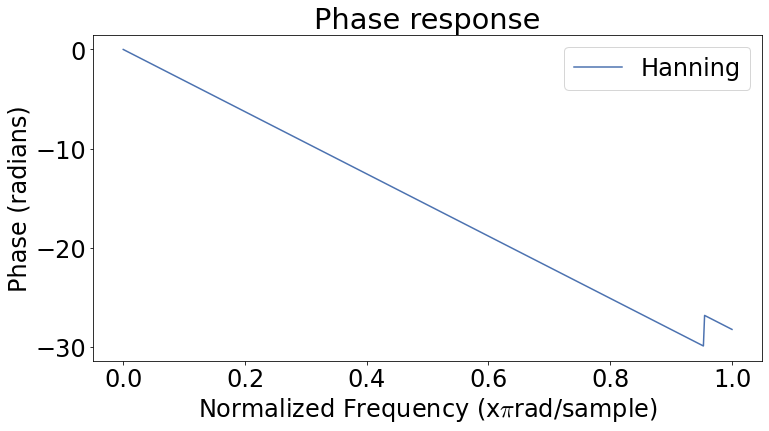

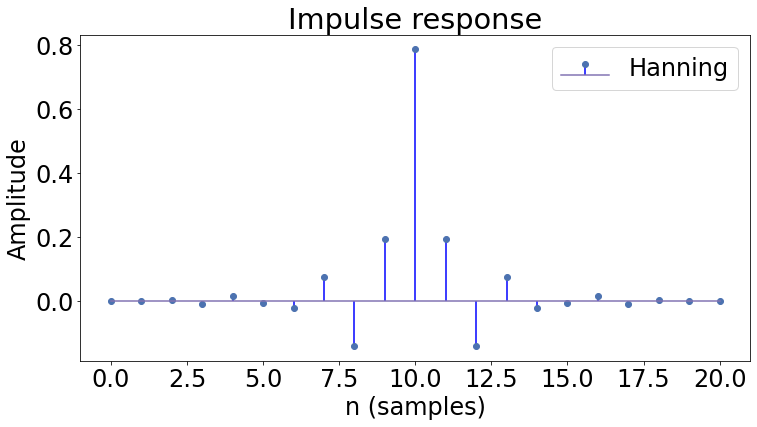

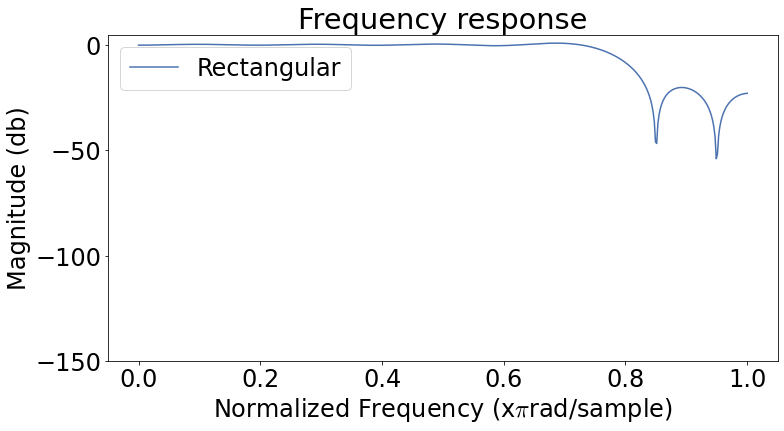

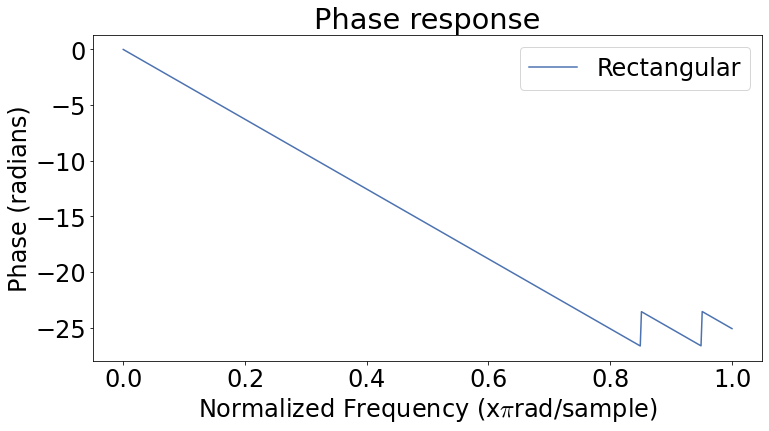

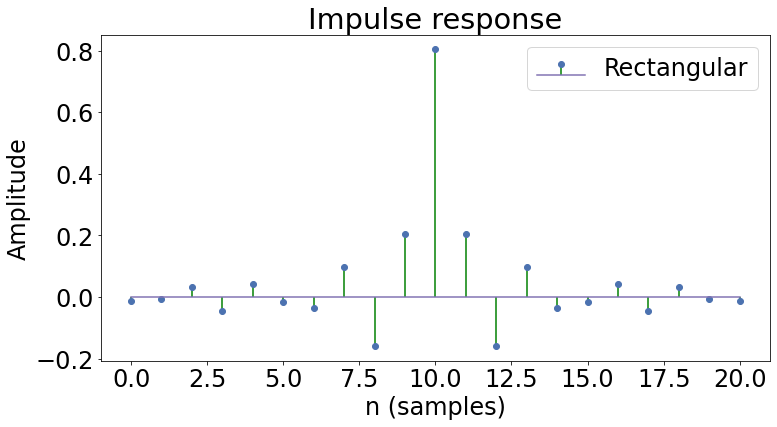

In [26]:
#Problem 2
def impulse_resp(A,b=1):
    l=len(A)
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = sp.lfilter(A,b,impulse)
    return x,response

def mfreqz(b,label,a=1):
    w,h = sp.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    plt.figure()
    plt.plot(w/max(w),h_dB,label=label)
    plt.ylim(-150, 5)
    plt.ylabel('Magnitude (db)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response')
    plt.legend()
    plt.figure()
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.plot(w/max(w),h_Phase,label=label)
    plt.ylabel('Phase (radians)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Phase response');plt.legend()
    


n = 21
wc=np.pi/(a+1)

A1 = sp.firwin(n, cutoff = wc, window = "hanning")

mfreqz(A1,"Hanning")

plt.figure()
x,response=impulse_resp(A1)
plt.stem(x, response,'bo',label="Hanning")
plt.ylabel('Amplitude')
plt.xlabel(r'n (samples)')
plt.title(r'Impulse response');plt.legend()

A2 = sp.firwin(n, cutoff = wc, window = "boxcar")

mfreqz(A2,"Rectangular")

#plt.figure()
plt.figure()
x,response=impulse_resp(A2)
plt.stem(x, response,'go',label="Rectangular")
plt.ylabel('Amplitude')
plt.xlabel(r'n (samples)')
plt.title(r'Impulse response');plt.legend()

11025


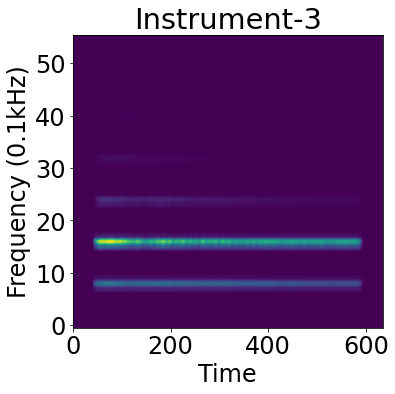

In [29]:
#Problem 3

def spec_plot(x,window,overlap,title):
    freqs, times, spectrogram = scipy.signal.spectrogram(x,100,window=window,noverlap=overlap)
    plt.figure(figsize=(6,6))
    plt.imshow(spectrogram,origin='lower',aspect='auto') #aspect='auto', cmap='hot_r', origin='lower')
    plt.title(title)
    plt.ylabel('Frequency (0.1kHz)')
    plt.xlabel('Time')
    plt.tight_layout()

import scipy
Fs1 , data= wavfile.read('instru3.wav')
print(Fs1)
w=np.hamming(111)
spec_plot(data,w,0,'Instrument-3')
IPython.display.Audio(data, rate=11025)



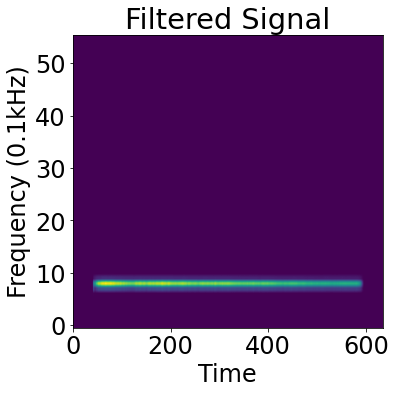

In [31]:
def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    nyq = 0.5 * fs
    taps = sp.firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

fs=11025
n=111
lowcut=600
highcut=800

ntaps = 128
taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=fs)
#A3= sp.firwin(n, cutoff = [wc1,wc2], window = "hamming",fs=11025)
#plt.stem(A3)
filt_sig= sp.lfilter(taps_hamming,1,data)
#w=np.hamming(111)

w=np.hamming(111)
spec_plot(filt_sig,w,0,'Filtered Signal')
#spec_plot(filt_sig,0,'Instrument-3')

IPython.display.Audio(filt_sig,rate=11025)
write("Filtered_instru3.wav", 11025, filt_sig.astype(np.float32))
IPython.display.Audio(filt_sig,rate=11025)